# On the mutual information 

**Abstract:** Measure the mutual information between variables and how this condition the inference of labels from data is a very interesting and non-trivial topic. To illustrate some of these ideas, imagine we have digit images $X_i\in X$ (e.g., MNIST) and their labels $y_i \in y$. How can we measure the mutual information between the data $X$ and the labels $y$? How this mutual information can be used as a bound on the classification performance? What happens when training a dnn in terms of the mutual information. 

Refs:
1. Hjelm, R. D. (2018). Mutual Information Neural Estimation.
2. Shwartz-Ziv, R., & Tishby, N. (2017). Opening the Black Box of Deep Neural Networks via Information. 
3. Kraskov, A., & Grassberger, P. (2004). Estimating mutual information.

In [1]:
import numpy as np
import sys
sys.path.append('../libs')
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

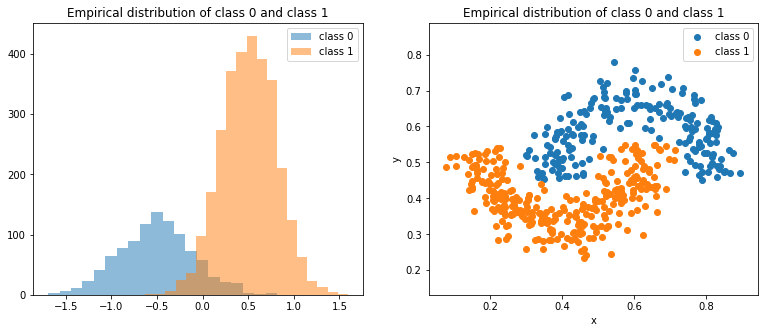

In [2]:
# toy example 1:
plt.figure(figsize=[13,5])
from data import toy_data1, toy_data2
plt.subplot(121); 
X,y = toy_data1(n0=1000, n1=3000, verbose=1)
# toy example 2:
plt.subplot(122);
X,y = toy_data2(n0=200, n1=300, verbose=1)

(1500, 2)
(1500,)


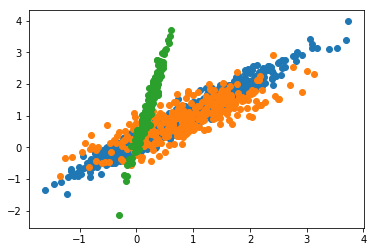

In [81]:
# toy example 3: N multivariate gaussians in a d dimensional space. 
from data import toy_data3
X,y = toy_data3(n=(1000,300,200),d=2)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
print(X.shape)
print(y.shape)

Continue from here doing the high dimensional multivariate 
http://www.aishack.in/tutorials/generating-multivariate-gaussian-random/
https://stackoverflow.com/questions/44600488/draw-multivariate-gaussian-distribution-samples-using-python-numpy-random-randn

### 

(2, 10000)


array([1.69955314, 0.9244765 ])

array([[1.45358065, 0.79871653],
       [0.79871653, 0.44383849]])

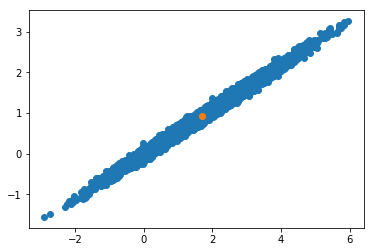

In [28]:
plt.scatter(x[0,:],x[1,:])
plt.scatter(mu[0], mu[1